<a href="https://colab.research.google.com/github/ekpurwanto/Auto-Loan-Default/blob/main/Auto_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/Automobile Loan Default Dataset/Train_Dataset.csv")

<ipython-input-97-05304592abbf>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Kaggle/Automobile Loan Default Dataset/Train_Dataset.csv")


In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [99]:
# Statistik deskriptif dataset
print(df.describe())

                 ID      Car_Owned     Bike_Owned    Active_Loan  \
count  1.218560e+05  118275.000000  118232.000000  118221.000000   
mean   1.216093e+07       0.342854       0.332262       0.499175   
std    3.517694e+04       0.474665       0.471026       0.500001   
min    1.210000e+07       0.000000       0.000000       0.000000   
25%    1.213046e+07       0.000000       0.000000       0.000000   
50%    1.216093e+07       0.000000       0.000000       0.000000   
75%    1.219139e+07       1.000000       1.000000       1.000000   
max    1.222186e+07       1.000000       1.000000       1.000000   

           House_Own    Child_Count  Own_House_Age     Mobile_Tag  \
count  118195.000000  118218.000000   41761.000000  121856.000000   
mean        0.692060       0.417779      12.157324       0.999992   
std         0.461644       0.728802      12.056079       0.002865   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

Langkah 2: Preprocessing Data

In [100]:
# Mengatasi missing values
df.dropna(inplace=True)  # Menghapus baris dengan missing values

# Encoding data kategorikal
df = pd.get_dummies(df, columns=['Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Type_Organization', 'Client_Occupation'])

# Memisahkan dataset menjadi training set dan testing set
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Default'])  # Fitur-fitur
y = df['Default']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
pip install --upgrade seaborn

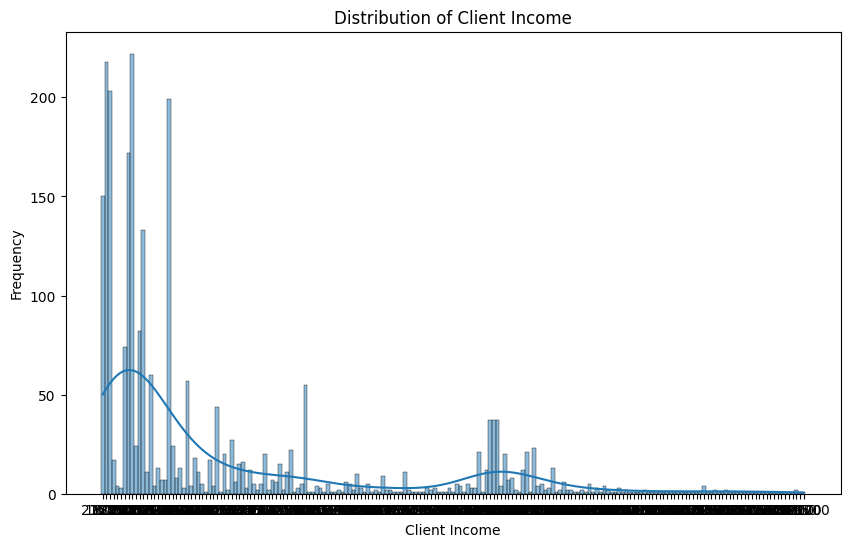

In [107]:
# Mengonversi kolom 'Client_Income' menjadi tipe data string
df['Client_Income'] = df['Client_Income'].astype(str)

# Visualisasi histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Client_Income', kde=True)
plt.xlabel('Client Income')
plt.ylabel('Frequency')
plt.title('Distribution of Client Income')
plt.show()


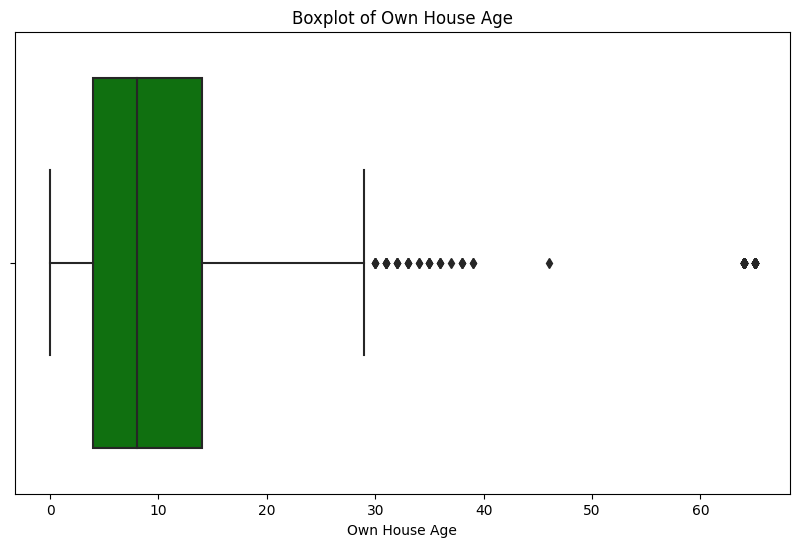

In [111]:
# Visualisasi boxplot untuk kolom "Own_House_Age" dengan warna hijau
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Own_House_Age', color='green')
plt.xlabel('Own House Age')
plt.title('Boxplot of Own House Age')
plt.show()
